<a href="https://colab.research.google.com/github/shrutikamokashi/Amazon-Reviews-for-Sentiment-Analysis/blob/master/ALY6040_Week2_EDA_AnimeData_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MyAnimeList Database 2020
This dataset contains information about 17562 anime and the preference from 325772 different users. 

In particular, this dataset contain:

* The anime list per user. Include dropped, complete, plan to watch, currently watching and on hold.
* Ratings given by users to the animes that they has watched completely.
* Information about the anime like genre, stats, studio, etc.
* These files contain information such as reviews, synopsis, information about the staff, anime statistics, genre, etc.


## animelist.csv have the list of all animes register by the user with the respective score, watching status and numbers of episodes watched. This dataset contains 109 Million row, 17.562 different animes and 325.772 different users. The file have the following columns:
* user_id: non identifiable randomly generated user id.
* anime_id: MyAnemlist ID of the anime. (e.g. 1).
* score: score between 1 to 10 given by the user. 0 if the user didn't assign a score. (e.g. 10)
* watching_status: state ID from this anime in the anime list of this user. (e.g. 2)
* watched_episodes: numbers of episodes watched by the user. (e.g. 24)

## watching_status.csv describe every possible status of the column:
"watching_status" in animelist.csv.

## rating_complete.csv is a subset of animelist.csv. 
This dataset only considers animes that the user has watched completely (watching_status==2) and gave it a score (score!=0). This dataset contains 57 Million ratings applied to 16.872 animes by 310.059 users. This file have the following columns:

* user_id: non identifiable randomly generated user id.
* anime_id: - MyAnimelist ID of the anime that this user has rated.
* rating: rating that this user has assigned.

## anime.csv contain general information of every anime (17.562 different anime) like genre, stats, studio, etc. This file have the following columns:
* MAL_ID: MyAnimelist ID of the anime. (e.g. 1)
* Name: full name of the anime. (e.g. Cowboy Bebop)
* Score: average score of the anime given from all users in MyAnimelist database. (e.g. 8.78)
* Genders: comma separated list of genres for this anime. (e.g. Action, Adventure, Comedy, Drama, Sci-Fi, Space)
* English name: full name in english of the anime. (e.g. Cowboy Bebop)
* Japanese name: full name in japanses of the anime. (e.g. カウボーイビバップ)
* Type: TV, movie, OVA, etc. (e.g. TV)
* Episodes': number of chapters. (e.g. 26)
* Aired: broadcast date. (e.g. Apr 3, 1998 to Apr 24, 1999)
* Premiered: season premiere. (e.g. Spring 1998)
* Producers: comma separated list of produducers (e.g. Bandai Visual)
* Licensors: comma separated list of licensors (e.g. Funimation, Bandai Entertainment)
* Studios: comma separated list of studios (e.g. Sunrise)
* Source: Manga, Light novel, Book, etc. (e.g Original)
* Duration: duration of the anime per episode (e.g 24 min. per ep.)
* Rating: age rate (e.g. R - 17+ (violence & profanity))
* Ranked: position based in the score. (e.g 28)
* Popularity: position based in the the number of users who have added the anime to their list. (e.g 39)
* Members: number of community members that are in this anime's "group". (e.g. 1251960)
* Favorites: number of users who have the anime as "favorites". (e.g. 61,971)
* Watching: number of users who are watching the anime. (e.g. 105808)
* Completed: number of users who have complete the anime. (e.g. 718161)
* On-Hold: number of users who have the anime on Hold. (e.g. 71513)
* Dropped: number of users who have dropped the anime. (e.g. 26678)
* Plan to Watch': number of users who plan to watch the anime. (e.g. 329800)
* Score-10': number of users who scored 10. (e.g. 229170)
* Score-9': number of users who scored 9. (e.g. 182126)
* Score-8': number of users who scored 8. (e.g. 131625)
* Score-7': number of users who scored 7. (e.g. 62330)
* Score-6': number of users who scored 6. (e.g. 20688)
* Score-5': number of users who scored 5. (e.g. 8904)
* Score-4': number of users who scored 4. (e.g. 3184)
* Score-3': number of users who scored 3. (e.g. 1357)
* Score-2': number of users who scored 2. (e.g. 741)
* Score-1': number of users who scored 1. (e.g. 1580)

Importing packages

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from collections import defaultdict
import re

In [ ]:
anime = pd.read_csv("anime.csv")
anime_with_synopsis = pd.read_csv("anime_with_synopsis.csv")
#rating_complete = pd.read_csv("rating_complete.csv")
#watching_status = pd.read_csv("watching_status.csv")
#animelist = pd.read_csv("animelist.csv")

In [ ]:
anime

,MAL_ID,Name,Score,Genders,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [ ]:
result = pd.merge(anime, anime_with_synopsis, on=["Name", "MAL_ID"])
result

,MAL_ID,Name,Score_x,Genders_x,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Score_y,Genders_y,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"Adventure, Mystery, Supernatural",No synopsis information has been added to this...
16210,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,"Comedy, Horror, Supernatural",ko is a typical high school student whose life...
16211,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unkno

In [ ]:
result.shape

(16214, 38)

In [ ]:
result.dtypes

MAL_ID            int64
Name             object
Score_x          object
Genders_x        object
English name     object
Japanese name    object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
Score_y          object
Genders_y        object
sypnopsis        object
dtype: object

In [ ]:
## Removing unwanted columns
result.drop(columns=['MAL_ID','Japanese name','Score_y','Genders_y'],inplace=True)
result.rename(columns={'Genders_x':'Genres','Score_x':'Score'},inplace=True)
anime = result.copy()
anime

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ..."
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0..."
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No synopsis information has been added to this...
16210,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,ko is a typical high school student whose life...
16211,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Sequel to Higurashi no Naku Koro ni Gou .
16212,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,New Yama no Susume anime.


In [ ]:
anime.describe()

,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,16214.000000,1.621400e+04,16214.000000,16214.000000,1.621400e+04,16214.000000,16214.000000,16214.000000
mean,8869.684902,3.709850e+04,492.864376,2375.174664,2.367763e+04,1015.162699,1256.641729,8773.895584
std,5213.733201,1.300729e+05,4227.040482,14608.639331,9.453259e+04,4444.119890,4924.191406,24657.113281
min,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,4104.000000,3.030000e+02,0.000000,12.000000,1.010000e+02,5.000000,35.000000,99.000000
50%,9137.500000,1.773500e+03,2.000000,58.000000,6.730000e+02,34.000000,68.000000,679.000000
75%,13478.750000,1.554000e+04,31.000000,492.000000,7.522000e+03,288.000000,277.000000,4864.750000
max,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [ ]:
anime.isnull().sum()

## There are no null values present

Name             0
Score            0
Genres           0
English name     0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
sypnopsis        8
dtype: int64

In [ ]:
anime['Name'].nunique()
## Out of 17562 records, 17558 are unique names so we do not need to remove duplicates

16210

In [ ]:
anime.Genres.str.count("Unknown").sum()

63

In [ ]:
df = anime.replace(to_replace ="Unknown",
                 value =None)
anime = df.dropna()
anime

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever..."
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Spring 1998,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ..."
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0..."
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu","Funimation, Bandai Entertainment",Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,Daomu Biji Zhi Qinling Shen Shu,6.52,"Adventure, Mystery, Supernatural",Da Shen Xian,ONA,48,"Apr 4, 2021 to ?",Summer 2021,Bandai Namco Arts,Funimation,Arvo Animation,Novel,9 min. per ep.,PG-13 - Teens 13 or older,12855.0,13116,354,6,0,0,0,0,354,302.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,No synopsis information has been added to this...
16210,Mieruko-chan,6.52,"Comedy, Horror, Supernatural",Da Shen Xian,TV,48,2021 to ?,Summer 2021,Kadokawa,Funimation,Passione,Manga,9 min. per ep.,PG-13 - Teens 13 or older,12855.0,17562,7010,70,14,0,14,0,6982,302.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,ko is a typical high school student whose life...
16211,Higurashi no Naku Koro ni Sotsu,6.52,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,TV,48,"Jul, 2021 to ?",Summer 2021,Kadokawa,Funimation,Passione,Visual novel,9 min. per ep.,R - 17+ (violence & profanity),12855.0,17558,11309,48,3,0,0,0,11306,1.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,Sequel to Higurashi no Naku Koro ni Gou .
16212,Yama no Susume: Next Summit,6.52,"Adventure, Slice of Life, Comedy",Higurashi:When They Cry – SOTSU,TV,48,"Jul, 2021 to ?",Summer 2021,Kadokawa,Funimation,8bit,Manga,9 min. per ep.,PG-13 - Teens 13 or older,12855.0,17565,1386,2,13,2,2,1,1368,1.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,New Yama no Susume anime.


In [ ]:
#Drop duplicates anime 
anime.drop_duplicates(subset='Name', inplace=True)
anime.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(16202, 34)

In [ ]:
anime['Name'] = anime['Name'].astype(str)
print(anime[anime.Name.str.startswith(r'[^0-9]')])

Empty DataFrame
Columns: [Name, Score, Genres, English name, Type, Episodes, Aired, Premiered, Producers, Licensors, Studios, Source, Duration, Rating, Ranked, Popularity, Members, Favorites, Watching, Completed, On-Hold, Dropped, Plan to Watch, Score-10, Score-9, Score-8, Score-7, Score-6, Score-5, Score-4, Score-3, Score-2, Score-1, sypnopsis]
Index: []


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
anime[anime['Name'].astype(str).str.startswith('#')]

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis
13762,#Compass,6.38,Game,Operation Han-Gyaku-Sei Million Arthur Special,ONA,1,"Aug 22, 2018 to ?",Winter 2019,"Square Enix, Sotsu, Genco, Lantis, Magic Capsu...",GKIDS,"TMS Entertainment, Echoes",Game,4 min.,G - All Ages,13189.0,13691,284,0,59,0,22,39,164,4.0,1.0,4.0,4.0,5.0,4.0,8.0,3.0,2.0,6.0,NHN PlayArt and Nico Nico's #Compass [COMbat P...


In [ ]:
# get genres
Genres = defaultdict(int)
for val in anime['Genres']:
  for v in val.split(','):
    Genres[ v.strip() ] += 1

print("anime genres = ", list(dict(Genres).keys()) )


anime genres =  ['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen', 'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei', 'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological', 'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire', 'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai', 'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids', 'Parody', 'Yaoi']


In [ ]:
# Creating Release year and month
years  = []
months = []
for val in anime['Aired']:
  vr = val.split()
  y = 'Unknown'
  m = 'Unknown'
  for v in vr:
    if v.isdigit() and len(v) == 4 :
      y = v
      break
  for v in vr:
    if not v.isdigit() and len(v) >= 3 and v[0].isupper() and v != 'Unknown' :
      m = v[:3]
      break

  years += [ y ]
  months += [ m ]

anime['Year'] = years
anime['Month'] = months

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
anime.dtypes

Name             object
Score            object
Genres           object
English name     object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
sypnopsis        object
Year             object
Month            object
dtype: object

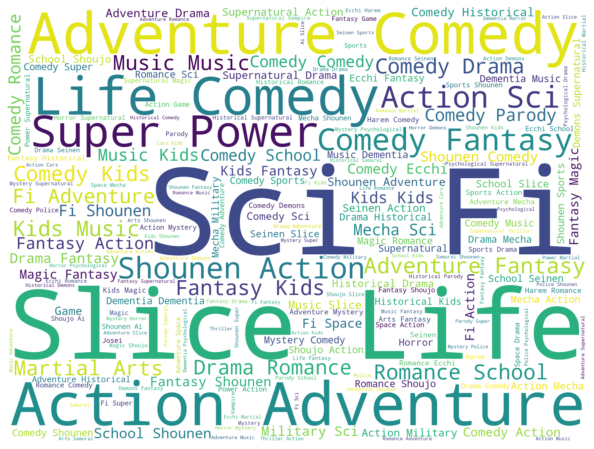

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = ' '.join(str(v) for v in anime.Genres)
#" ".join(review for review in anime.Genres)
genres_cloud = WordCloud(width=2000, height=1500, background_color="white").generate(text)
plt.figure(figsize=(15,8))

plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



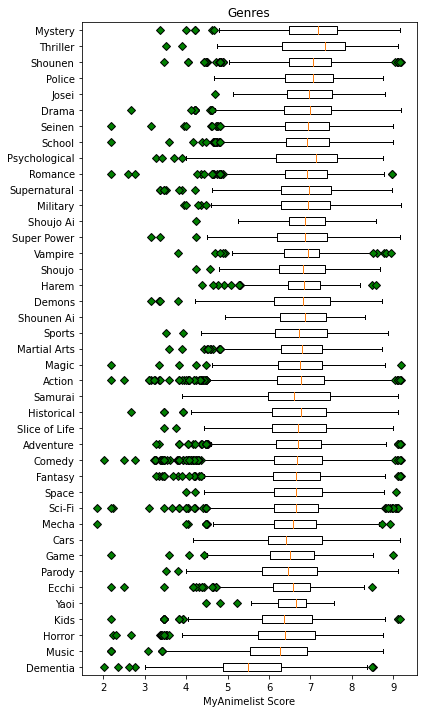

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



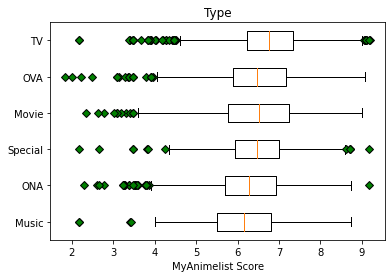

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



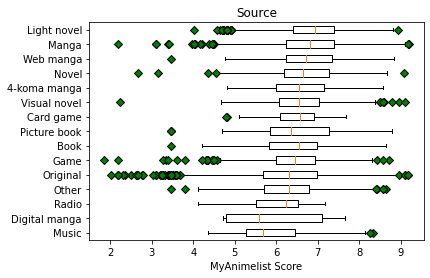

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



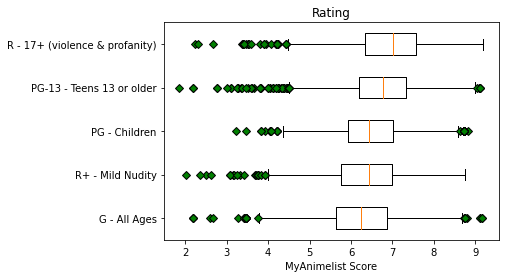

In [ ]:
### Finding outliers
###################################### Plots
score_var  = 'Score'
for f in ['Genres', 'Type', 'Source', 'Rating'] :
  anime[f] = anime[f].str.split(', ')
  datas = defaultdict(list)
  for score, types in zip( anime[score_var], anime[f] ):
    if score == "Unknown": continue
    for type in types :
      datas[ type ] += [ float(score) ]

  sorted_datas = sorted(datas.items(), key=lambda f : sum(f[1])/len(f[1]) )

  fig, ax = plt.subplots()
  ax.set_title( f )
  if f == "Genres" :
    ax.set_title( "Genres" )
    fig.set_figheight( 3*fig.get_figheight() )
  ax.boxplot( [f[1] for f in sorted_datas], vert=False, flierprops=dict(markerfacecolor='g', marker='D') )
  ax.set_yticklabels( [f[0] for f in sorted_datas] )
  ax.set_xlabel('MyAnimelist Score')
  plt.show()
#anime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



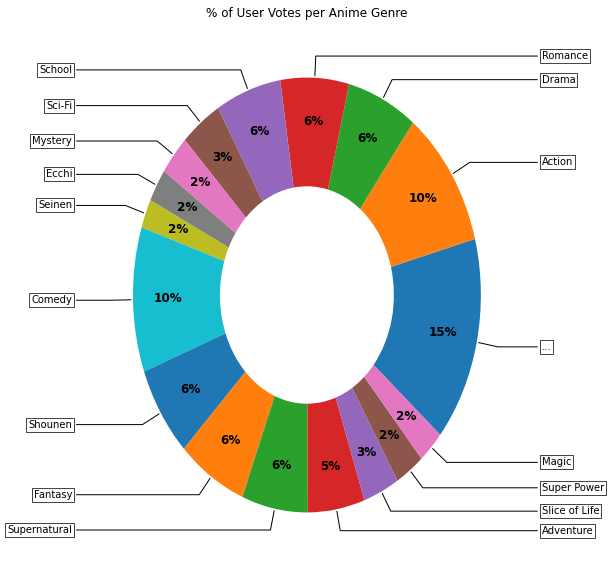

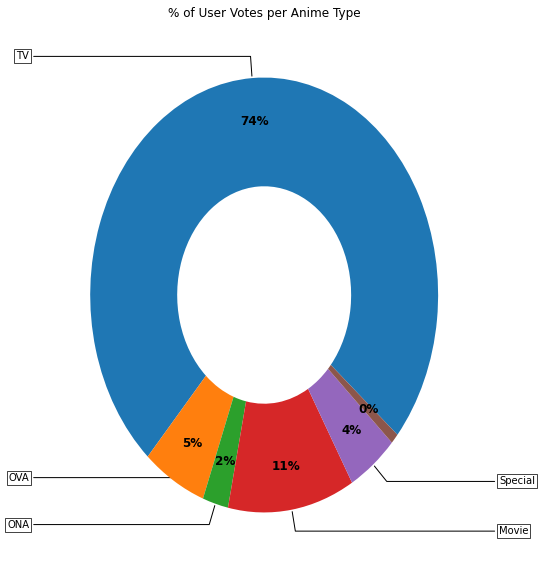

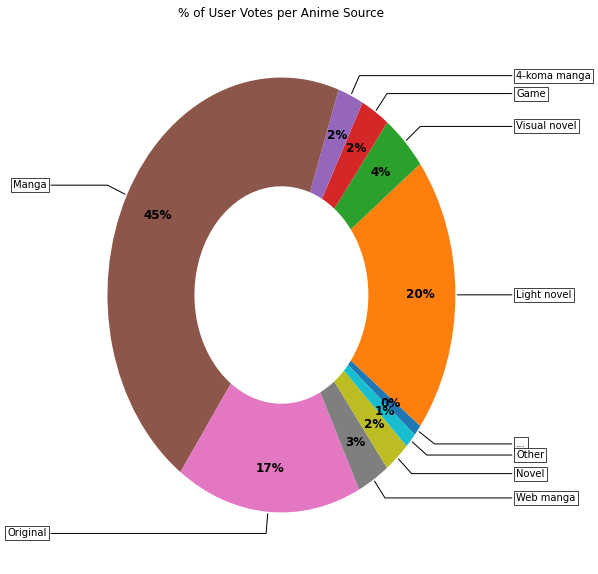

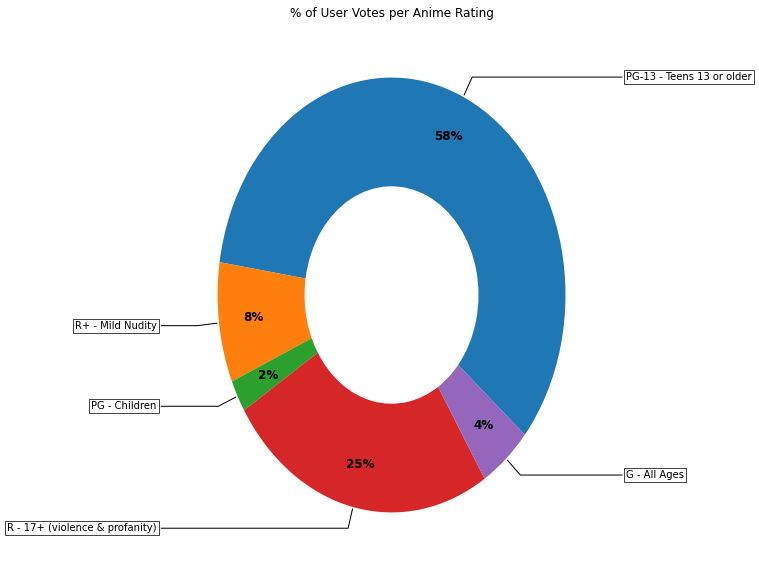

In [ ]:
def get_voters(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10):
    x = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]
    def f(val) :
      if val == "Unknown" : return 0
      return float(val)
    return int(sum(map(f, x)))
anime["N_votes"] = anime.apply(lambda x: get_voters(x['Score-1'], x['Score-2'], x['Score-3'], x['Score-4'], x['Score-5'], x['Score-6'], x['Score-7'], x['Score-8'], x['Score-9'], x['Score-10']), axis=1)

for f in ['Genres', 'Type', 'Source', 'Rating'] :
    datas = defaultdict(list)
    for score, types in zip( anime["N_votes"], anime[f] ):
      if score == "Unknown": continue
      for type in types :
        datas[ type ] += [ float(score) ]

    sorted_datas = sorted(datas.items(), key=lambda f : sum(f[1]) )
    data_x = [sum(f[1]) for f in sorted_datas]
    data_xx = [len(f[1]) for f in sorted_datas]
    data_y = [f[0] for f in sorted_datas]

    if f == 'Source':
      data_x = data_x[-9:] + [ sum(data_x[:-9]) ]
      data_y = data_y[-9:] + [ '...' ]
    if f == 'Genres':
      data_x = data_x[-16:] + [ sum(data_x[:-18]) ]
      data_y = data_y[-16:] + [ '...' ]
    if f == 'Year_class':
      data_x = data_x[-8:] + [ sum(data_x[:-8]) ]
      data_y = data_y[-8:] + [ '...' ]

    data_x = list(reversed(data_x))
    data_y = list(reversed(data_y))

    fig, ax = plt.subplots(figsize=(30,10))
    data_y = data_y[::2] + list(data_y[1::2])
    wedges, texts, autotexts = ax.pie(data_x[::2] + list(data_x[1::2]), wedgeprops=dict(width=0.5), startangle=-40, autopct='%d%%', pctdistance=0.80)

    bbox_props = dict(boxstyle="square,pad=0.2", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
      ang = (p.theta2 - p.theta1)/2. + p.theta1
      y = np.sin(np.deg2rad(ang))
      x = np.cos(np.deg2rad(ang))
      horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
      connectionstyle = "angle,angleA=0,angleB={}".format(ang)
      kw["arrowprops"].update({"connectionstyle": connectionstyle})
      if data_y[i] == "Unknown" : continue
      if data_y[i] == "Music" : continue
      extra = 0
      if data_y[i] == "Rx - Hentai" : extra = 0.1
      if data_y[i] == "OVA" : extra = 0.1
      ax.annotate(data_y[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.1*y+extra), horizontalalignment=horizontalalignment, **kw)

    plt.setp(autotexts, size=12, weight="bold", color="black")
    ax.set_aspect(aspect=1.25)

    plt.title("% of User Votes per Anime " + f)
    if f == "Genres" : plt.title( "% of User Votes per Anime Genre" )
#    if f == "Rating"  : plt.title( "% of User Votes per Anime Age rating" )
#   if f == 'Year_class' : plt.title( "% of User Votes per Anime Release year" )
#   if f == 'Month' :      plt.title( "% of User Votes per Anime Release month" )


In [ ]:
## Years in which highest animes produced
df = anime['Year'].value_counts().sort_values(ascending=False).reset_index().head(10)

In [ ]:
df = df.rename(columns={'index':'Year', 'Year':'Count of Animes'})

In [ ]:
df.dtypes

Year               object
Count of Animes     int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

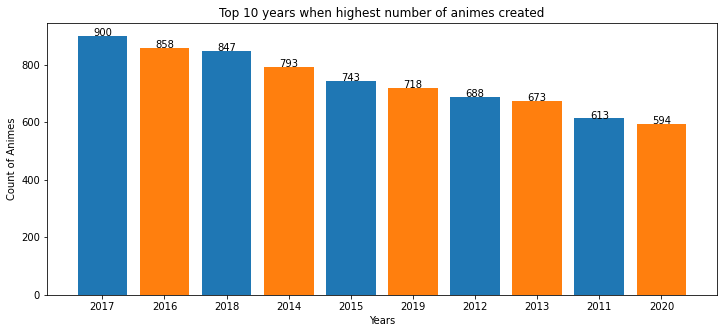

In [ ]:
if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = df['Year'].astype(str)
    y= df['Count of Animes']

    #[922,897,882,852,792,730,729,729,674,603]
    # setting figure size by using figure() function
    plt.figure(figsize = (12, 5))

    # making the bar chart on the data
    plt.bar(x, y, color=['C0','C1'])

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title("Top 10 years when highest number of animes created")

    # giving X and Y labels
    plt.xlabel("Years")
    plt.ylabel("Count of Animes")

    # visualizing the plot
    plt.show()


In [ ]:
df2 = anime['Type'].value_counts().reset_index()
df2 = df2.rename(columns={'index':'Anime Type', 'Type':'Count'})

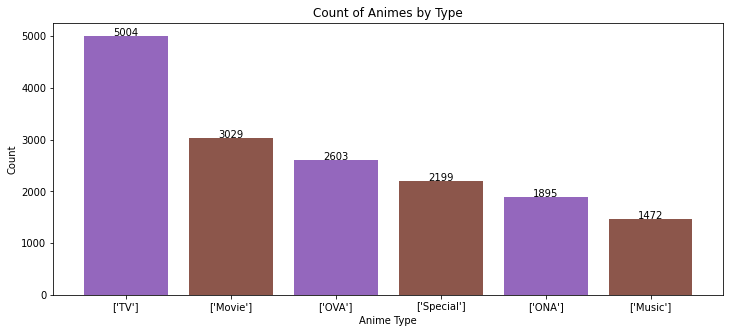

In [ ]:
if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = df2['Anime Type'].astype(str)
    y= df2['Count']
    plt.figure(figsize = (12, 5))
    plt.bar(x, y, color=['C4','C5'])
    addlabels(x, y)
    plt.title("Count of Animes by Type")
    plt.xlabel("Anime Type")
    plt.ylabel("Count")
    plt.show()



In [ ]:
df3 = anime['Rating'].value_counts().reset_index()
df3 = df3.rename(columns={'index':'Rating', 'Rating':'Count'})


Text(0, 0.5, 'Count')

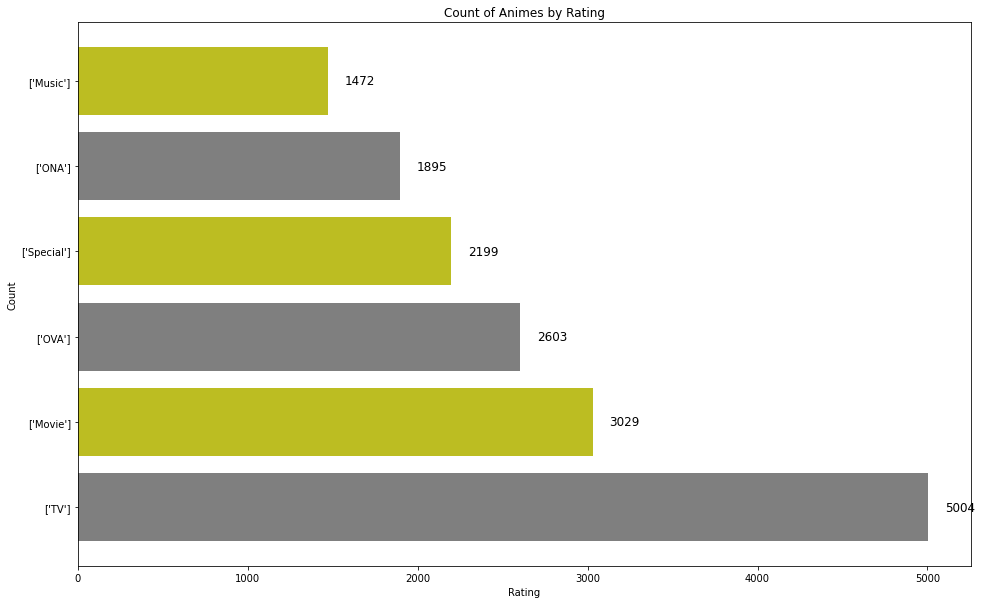

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))
ax.barh(x, y, color=['C7','C8'])
for i, v in enumerate(y):
    ax.text(v + 100, i, str(v), color='black', fontsize=12, ha='left', va='center')
plt.title("Count of Animes by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")

In [ ]:
df4 = anime['Source'].value_counts().reset_index()
df4 = df4.rename(columns={'index':'Source', 'Source':'Count'})

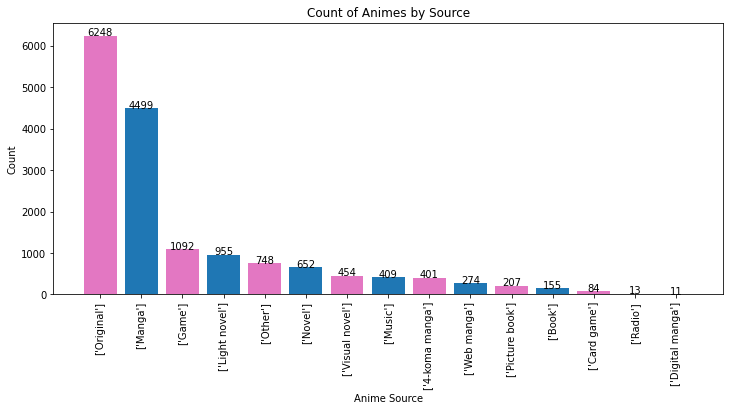

In [ ]:
##creating data on which bar chart will be plot
x = df4['Source'].astype(str)
y= df4['Count']
plt.figure(figsize = (12, 5))
plt.bar(x, y, color=['C6','C10'])
addlabels(x, y)
plt.title("Count of Animes by Source")
plt.xlabel("Anime Source")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()

In [ ]:
df5 = anime.sort_values('Score', ascending=False)
df5["Score"].replace({"Unknown": "0"}, inplace=True)
df5 = df5.sort_values('Score', ascending=False).head(10).sort_values('Score')

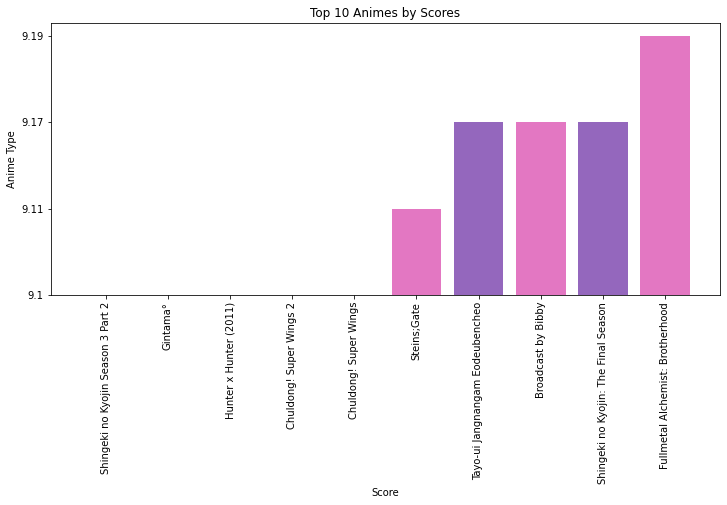

In [ ]:
if __name__ == '__main__':

    # creating data on which bar chart will be plot
    y = df5['Score']
    x= df5['Name']
    plt.figure(figsize = (12, 5))
    plt.bar(x, y, color=['C4','C6'])
    #addlabels(x, y)
    plt.title("Top 10 Animes by Scores")
    plt.xlabel("Score")
    plt.ylabel("Anime Type")
    plt.xticks(x, x, rotation ='vertical')
    plt.show()

In [ ]:
df5 = anime.sort_values('Ranked', ascending=False)
df5["Ranked"].replace({"Unknown": "0"}, inplace=True)
df5 = df5.sort_values('Ranked', ascending=False).head(10).sort_values('Ranked')
#df5

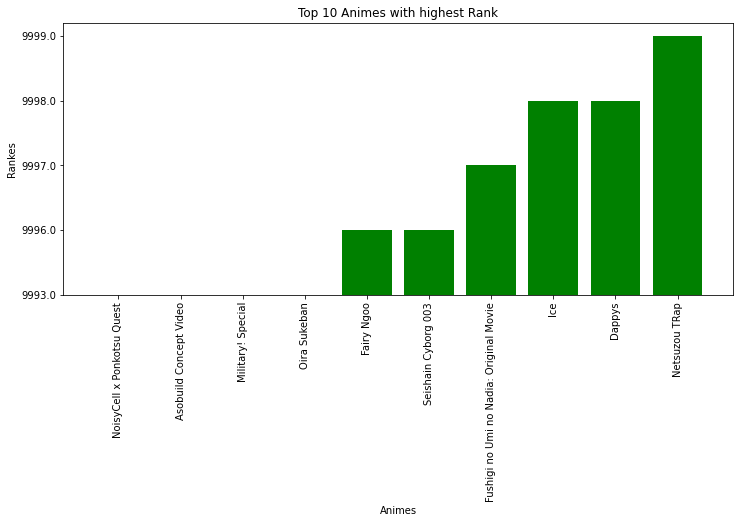

In [ ]:

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    y = df5['Ranked']
    x = df5['Name']

    plt.figure(figsize = (12, 5))

    # making the bar chart on the data
    plt.bar(x, y, color=['Green'])

    # calling the function to add value labels
    # function to add value labels
    #addlabels(x, y)

    # giving title to the plot
    plt.title("Top 10 Animes with highest Rank")

    # giving X and Y labels
    plt.ylabel("Rankes")
    plt.xlabel("Animes")
    plt.xticks(x, x, rotation ='vertical')
    # visualizing the plot
    plt.show()

In [ ]:
# get Types
Types = defaultdict(int)
val1 = ''
for val in anime['Type']:
  val1 = ','.join([str(elem) for elem in val])
  Types[ val1.strip() ] += 1
print("anime types = ", list(dict(Types)) )

anime types =  ['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music']


In [ ]:
# get genres
Genres = defaultdict(int)
val1 = ''
for val in anime['Genres']:
  val1 = ','.join([str(elem) for elem in val])
  for v in val1.split(','):
    Genres[ v.strip() ] += 1

print("anime genres = ", list(dict(Genres).keys()) )

anime genres =  ['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen', 'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei', 'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological', 'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire', 'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai', 'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids', 'Parody', 'Yaoi']


Shounen : action, adventure,

Josei : Romance


Slice of Life : Romance, Drama 

Seinen : Youth

Ecchi : Comedy

Mecha : Sci-Fi

Shoujo : Fantasy

Harem : Romance

Shoujo Ai : Romance

Shounen Ai : Romance

Hentai : Omit

Parody : Comedy

Yuri : Romance

Yaoi : Romance

Cars : Adventure

Super Power : Action

Space : Sci-Fi

Police : Action

Supernatural : Fantasy

Vampire : Fantasy

Dementia : Psychological

Demons : Fantasy

Martial Arts : Action

Samurai : Historical

Kids : Fantasy

Sports : Adventure

School : Drama


In [ ]:
anime_data = anime.copy()
anime_data['Genres'] = anime_data['Genres'].apply(','.join)
anime_data['Type'] = anime_data['Type'].apply(','.join)

#anime_data['Genres'] = anime_data['Genres'].apply(','.join(set(text.split(','))))
anime_data
#anime

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis,Year,Month,N_votes
0,Cowboy Bebop,8.78,"Action,Adventure,Comedy,Drama,Sci-Fi,Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,[Original],24 min. per ep.,[R - 17+ (violence & profanity)],28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever...",1998,Apr,641705
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action,Drama,Mystery,Sci-Fi,Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Spring 1998,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,[Original],1 hr. 55 min.,[R - 17+ (violence & profanity)],159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ...",2001,Sep,160349
2,Trigun,8.24,"Action,Sci-Fi,Adventure,Comedy,Drama,Shounen",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,[Manga],24 min. per ep.,[PG-13 - Teens 13 or older],266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0...",1998,Apr,286146
3,Witch Hunter Robin,7.27,"Action,Mystery,Police,Supernatural,Drama,Magic",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,[Original],25 min. per ep.,[PG-13 - Teens 13 or older],2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...,2002,Jul,39094
4,Bouken Ou Beet,6.98,"Adventure,Fantasy,Shounen,Supernatural",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu","Funimation, Bandai Entertainment",Toei Animation,[Manga],23 min. per ep.,[PG - Children],3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...,2004,Sep,5923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,Daomu Biji Zhi Qinling Shen Shu,6.52,"Adventure,Mystery,Supernatural",Da Shen Xian,ONA,48,"Apr 4, 2021 to ?",Summer 2021,Bandai Namco Arts,Funimation,Arvo Animation,[Novel],9 min. per ep.,[PG-13 - Teens 13 or older],12855.0,13116,354,6,0,0,0,0,354,302.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,No synopsis information has been added to this...,2021,Apr,1508
16210,Mieruko-chan,6.52,"Comedy,Horror,Supernatural",Da Shen Xian,TV,48,2021 to ?,Summer 2021,Kadokawa,Funimation,Passione,[Manga],9 min. per ep.,[PG-13 - Teens 13 or older],12855.0,17562,7010,70,14,0,14,0,6982,302.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,ko is a typical high school student whose life...,2021,Unknown,1508
16211,Higurashi no Naku Koro ni Sotsu,6.52,"Mystery,Dementia,Horror,Psychological,Supernat...",Higurashi:When They Cry – SOTSU,TV,48,"Jul, 2021 to ?",Summer 2021,Kadokawa,Funimation,Passione,[Visual novel],9 min. per ep.,[R - 17+ (violence & profanity)],12855.0,17558,11309,48,3,0,0,0,11306,1.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,Sequel to Higurashi no Naku Koro ni Gou .,2021,Jul,1207
16212,Yama no Susume: Next Summit,6.52,"Adventure,Slice of Life,Comedy",Higurashi:When They Cry – SOTSU,TV,48,"Jul, 2021 to ?",Summer 2021,Kadokawa,Funimation,8bit,[Manga],9 min. per ep.,[PG-13 - Teens 13 or older],12855.0,17565,1386,2,13,2,2,1,1368

In [ ]:
#anime_data['Genres'] = anime_data['Genres'].str.replace()
anime_data['Genres'] = anime_data['Genres'].str.replace('Shoujo Ai','Romance')
anime_data['Genres'] = anime_data['Genres'].str.replace('Shounen Ai','Romance')
anime_data['Genres'] = anime_data['Genres'].str.replace('Shounen',"Action, Adventure")
anime_data['Genres'] = anime_data['Genres'].str.replace('Josei','Romance')
anime_data['Genres'] = anime_data['Genres'].str.replace('Slice of Life',"Romance, Drama")
anime_data['Genres'] = anime_data['Genres'].str.replace('Seinen',"Drama, Romance")
anime_data['Genres'] = anime_data['Genres'].str.replace('Ecchi','Comedy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Mecha','Sci-Fi')
anime_data['Genres'] = anime_data['Genres'].str.replace('Shoujo','Fantasy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Harem','Romance')

anime_data['Genres'] = anime_data['Genres'].str.replace('Parody','Comedy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Yuri','Romance')
anime_data['Genres'] = anime_data['Genres'].str.replace('Yaoi','Romance')
anime_data['Genres'] = anime_data['Genres'].str.replace('Cars','Adventure')
anime_data['Genres'] = anime_data['Genres'].str.replace('Super Power','Action')
anime_data['Genres'] = anime_data['Genres'].str.replace('Space','Sci-Fi')
anime_data['Genres'] = anime_data['Genres'].str.replace('Police','Action')
anime_data['Genres'] = anime_data['Genres'].str.replace('Supernatural','Fantasy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Vampire','Fantasy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Dementia','Psychological')
anime_data['Genres'] = anime_data['Genres'].str.replace('Demons','Fantasy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Martial Arts','Action')
anime_data['Genres'] = anime_data['Genres'].str.replace('Samurai','Historical')
anime_data['Genres'] = anime_data['Genres'].str.replace('Kids','Fantasy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Sports','Adventure')
anime_data['Genres'] = anime_data['Genres'].str.replace('School','Drama')
anime_data['Genres'] = anime_data['Genres'].str.replace('Game','Adventure')
anime_data['Genres'] = anime_data['Genres'].str.replace('Horror','Dark Fantasy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Psychological','Dark Fantasy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Thriller','Dark Fantasy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Mystery','Dark Fantasy')
anime_data['Genres'] = anime_data['Genres'].str.replace('Magic','Fantasy')

#replace_values = {'Shounen':"action, adventure",'Josei':'Romance','Slice of Life':"Romance, Drama",'Seinen':"Drama, Romance",'Ecchi':'Comedy','Mecha':'Sci-Fi','Shoujo':'Fantasy',
#                  'Harem':'Romance','Shoujo Ai':'Romance','Shounen Ai':'Romance','Parody':'Comedy','Yuri':'Romance','Yaoi':'Romance','Cars':'Adventure',
#                  'Super Power':'Action','Space':'Sci-Fi','Police':'Action','Supernatural':'Fantasy','Vampire':'Fantasy','Dementia':'Psychological','Demons':'Fantasy','Martial Arts':'Action',
#                  'Samurai':'Historical','Kids':'Fantasy','Sports':'Adventure','School':'Drama'} 'Horror', 'Psychological', 'Thriller','Magic','Mystery
anime_data

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis,Year,Month,N_votes
0,Cowboy Bebop,8.78,"Action,Adventure,Comedy,Drama,Sci-Fi,Sci-Fi",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,[Original],24 min. per ep.,[R - 17+ (violence & profanity)],28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever...",1998,Apr,641705
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action,Drama,Dark Fantasy,Sci-Fi,Sci-Fi",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Spring 1998,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,[Original],1 hr. 55 min.,[R - 17+ (violence & profanity)],159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ...",2001,Sep,160349
2,Trigun,8.24,"Action,Sci-Fi,Adventure,Comedy,Drama,Action, A...",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,[Manga],24 min. per ep.,[PG-13 - Teens 13 or older],266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0...",1998,Apr,286146
3,Witch Hunter Robin,7.27,"Action,Dark Fantasy,Action,Fantasy,Drama,Fantasy",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,[Original],25 min. per ep.,[PG-13 - Teens 13 or older],2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...,2002,Jul,39094
4,Bouken Ou Beet,6.98,"Adventure,Fantasy,Action, Adventure,Fantasy",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu","Funimation, Bandai Entertainment",Toei Animation,[Manga],23 min. per ep.,[PG - Children],3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...,2004,Sep,5923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,Daomu Biji Zhi Qinling Shen Shu,6.52,"Adventure,Dark Fantasy,Fantasy",Da Shen Xian,ONA,48,"Apr 4, 2021 to ?",Summer 2021,Bandai Namco Arts,Funimation,Arvo Animation,[Novel],9 min. per ep.,[PG-13 - Teens 13 or older],12855.0,13116,354,6,0,0,0,0,354,302.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,No synopsis information has been added to this...,2021,Apr,1508
16210,Mieruko-chan,6.52,"Comedy,Dark Fantasy,Fantasy",Da Shen Xian,TV,48,2021 to ?,Summer 2021,Kadokawa,Funimation,Passione,[Manga],9 min. per ep.,[PG-13 - Teens 13 or older],12855.0,17562,7010,70,14,0,14,0,6982,302.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,ko is a typical high school student whose life...,2021,Unknown,1508
16211,Higurashi no Naku Koro ni Sotsu,6.52,"Dark Fantasy,Dark Fantasy,Dark Fantasy,Dark Fa...",Higurashi:When They Cry – SOTSU,TV,48,"Jul, 2021 to ?",Summer 2021,Kadokawa,Funimation,Passione,[Visual novel],9 min. per ep.,[R - 17+ (violence & profanity)],12855.0,17558,11309,48,3,0,0,0,11306,1.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,Sequel to Higurashi no Naku Koro ni Gou .,2021,Jul,1207
16212,Yama no Susume: Next Summit,6.52,"Adventure,Romance, Drama,Comedy",Higurashi:When They Cry – SOTSU,TV,48,"Jul, 2021 to ?",Summer 2021,Kadokawa,Funimation,8bit,[Manga],9 min. per ep.,[PG-13 - Teens 13 or older],12855.0,17565

In [ ]:
# get genres
Genres = defaultdict(int)
val1 = ''
for val in anime_data['Genres']:
  #val1 = ','.join([str(elem) for elem in val])
  for v in val.split(','):
    Genres[ v.strip() ] += 1

print("anime genres = ", list(dict(Genres).keys()) )

anime genres =  ['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Dark Fantasy', 'Fantasy', 'Romance', 'Military', 'Historical', 'Music']


In [ ]:
for col in ["Genres"]:
    anime_data[col] = anime_data[col].str.split(", ").map(set).str.join(", ")
# get genres
Genres = defaultdict(int)
for val in anime_data['Genres']:
  for v in val.split(','):
    Genres[ v.strip() ] += 1
    list_of_Genres = list(dict(Genres).keys())
print("anime genres = ", list(dict(Genres).keys()) )

anime genres =  ['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Dark Fantasy', 'Fantasy', 'Romance', 'Military', 'Historical', 'Music']


In [ ]:
#anime genres =  ['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Dark Fantasy', 'Fantasy', 'Romance', 'Military', 'Historical', 'Music']

anime_data['Drama'] = anime_data['Genres'].str.contains('Drama')
anime_data['Comedy'] = anime_data['Genres'].str.contains('Comedy')
anime_data['Adventure'] = anime_data['Genres'].str.contains('Adventure')
anime_data['Sci-Fi'] = anime_data['Genres'].str.contains('Sci-Fi')
anime_data['Action'] = anime_data['Genres'].str.contains('Action')
anime_data['Fantasy'] = anime_data['Genres'].str.contains('Fantasy')
anime_data['Dark Fantasy'] = anime_data['Genres'].str.contains('Dark Fantasy')
anime_data['Romance'] = anime_data['Genres'].str.contains('Romance')
anime_data['Military'] = anime_data['Genres'].str.contains('Military')
anime_data['Historical'] = anime_data['Genres'].str.contains('Historical')
anime_data['Music'] = anime_data['Genres'].str.contains('Music')

anime_data

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis,Year,Month,N_votes,Drama,Comedy,Adventure,Sci-Fi,Action,Fantasy,Dark Fantasy,Romance,Military,Historical,Music
0,Cowboy Bebop,8.78,"Action,Adventure,Comedy,Drama,Sci-Fi,Sci-Fi",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,[Original],24 min. per ep.,[R - 17+ (violence & profanity)],28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever...",1998,Apr,641705,True,True,True,True,True,False,False,False,False,False,False
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action,Drama,Dark Fantasy,Sci-Fi,Sci-Fi",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Spring 1998,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,[Original],1 hr. 55 min.,[R - 17+ (violence & profanity)],159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ...",2001,Sep,160349,True,False,False,True,True,True,True,False,False,False,False
2,Trigun,8.24,"Adventure, Action,Sci-Fi,Adventure,Comedy,Dram...",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,[Manga],24 min. per ep.,[PG-13 - Teens 13 or older],266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0...",1998,Apr,286146,True,True,True,True,True,False,False,False,False,False,False
3,Witch Hunter Robin,7.27,"Action,Dark Fantasy,Action,Fantasy,Drama,Fantasy",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,[Original],25 min. per ep.,[PG-13 - Teens 13 or older],2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...,2002,Jul,39094,True,False,False,False,True,True,True,False,False,False,False
4,Bouken Ou Beet,6.98,"Adventure,Fantasy,Action, Adventure,Fantasy",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu","Funimation, Bandai Entertainment",Toei Animation,[Manga],23 min. per ep.,[PG - Children],3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...,2004,Sep,5923,False,False,True,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,Daomu Biji Zhi Qinling Shen Shu,6.52,"Adventure,Dark Fantasy,Fantasy",Da Shen Xian,ONA,48,"Apr 4, 2021 to ?",Summer 2021,Bandai Namco Arts,Funimation,Arvo Animation,[Novel],9 min. per ep.,[PG-13 - Teens 13 or older],12855.0,13116,354,6,0,0,0,0,354,302.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,No synopsis information has been added to this...,2021,Apr,1508,False,False,True,False,False,True,True,False,False,False,False
16210,Mieruko-chan,6.52,"Comedy,Dark Fantasy,Fantasy",Da Shen Xian,TV,48,2021 to ?,Summer 2021,Kadokawa,Funimation,Passione,[Manga],9 min. per ep.,[PG-13 - Teens 13 or older],12855.0,17562,7010,70,14,0,14,0,6982,302.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,ko is a typical high school student whose life...,2021,Unknown,1508,False,True,False,False,False,True,True,False,False,False,False
16211,Higurashi no Naku Koro ni Sotsu,6.52,"Dark Fantas

In [ ]:
anime_updt = anime_data*1

In [ ]:
anime_updt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16202 entries, 0 to 16213
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           16202 non-null  object
 1   Score          16202 non-null  object
 2   Genres         16202 non-null  object
 3   English name   16202 non-null  object
 4   Type           16202 non-null  object
 5   Episodes       16202 non-null  object
 6   Aired          16202 non-null  object
 7   Premiered      16202 non-null  object
 8   Producers      16202 non-null  object
 9   Licensors      16202 non-null  object
 10  Studios        16202 non-null  object
 11  Source         16202 non-null  object
 12  Duration       16202 non-null  object
 13  Rating         16202 non-null  object
 14  Ranked         16202 non-null  object
 15  Popularity     16202 non-null  int64 
 16  Members        16202 non-null  int64 
 17  Favorites      16202 non-null  int64 
 18  Watching       16202 non-n

In [ ]:
#Score','Episodes','Ranked','Popularity','Members','Favorites','Watching','Completed','On-Hold','Dropped','Plan to Watch'
anime_updt["Score"] = anime_updt["Score"].astype(str).astype(float)
anime_updt["Episodes"] = anime_updt["Episodes"].astype(str).astype(int)
anime_updt["Ranked"] = anime_updt["Ranked"].astype(str).astype(float)
anime_updt["Popularity"] = anime_updt["Popularity"].astype(str).astype(int)
anime_updt["Members"] = anime_updt["Members"].astype(str).astype(int)
anime_updt["Favorites"] = anime_updt["Favorites"].astype(str).astype(int)
anime_updt["Watching"] = anime_updt["Watching"].astype(str).astype(int)
anime_updt["Completed"] = anime_updt["Completed"].astype(str).astype(int)
anime_updt["On-Hold"] = anime_updt["On-Hold"].astype(str).astype(int)
anime_updt["Dropped"] = anime_updt["Dropped"].astype(str).astype(int)
anime_updt["Plan to Watch"] = anime_updt["Plan to Watch"].astype(str).astype(int)


In [ ]:
# Calculating number of comments in each category

categories = ['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Dark Fantasy', 'Fantasy', 'Romance', 'Military', 'Historical', 'Music']

counts = []
for category in categories:
    counts.append((category, anime_updt[category].sum()))
df_stats = pd.DataFrame(counts, columns=['Category', 'Number of Occurence'])
df_stats

,Category,Number of Occurence
0,Action,5234
1,Adventure,4926
2,Comedy,6315
3,Drama,5483
4,Sci-Fi,2861
5,Dark Fantasy,1743
6,Fantasy,8068
7,Romance,4236
8,Military,572
9,Historical,1198


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



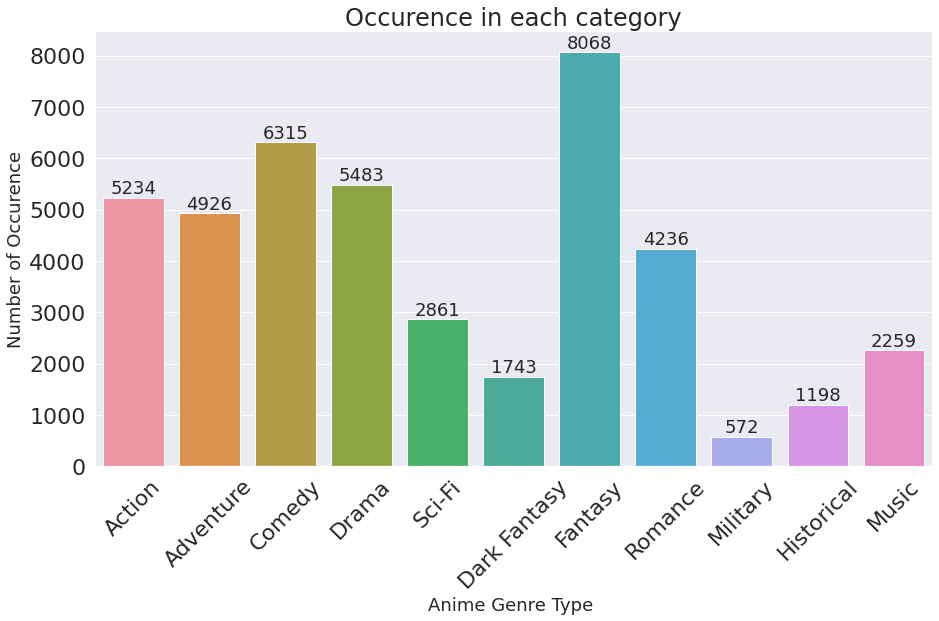

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, df_stats['Number of Occurence'])
plt.title("Occurence in each category", fontsize=24)
plt.ylabel('Number of Occurence', fontsize=18)
plt.xlabel('Anime Genre Type ', fontsize=18)
plt.xticks(rotation = 45)
#adding the text labels
rects = ax.patches
labels = df_stats['Number of Occurence']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

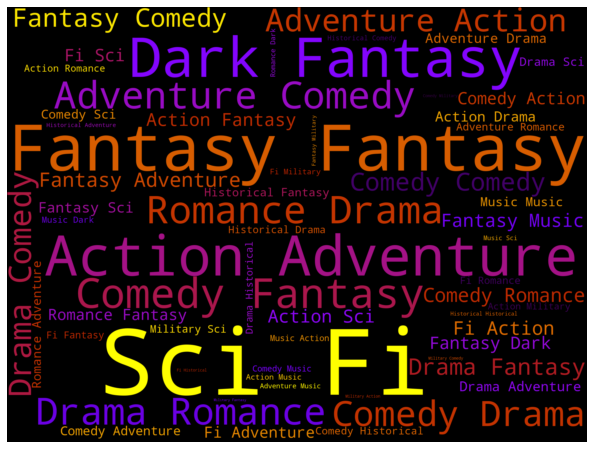

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = ' '.join(str(v) for v in anime_updt.Genres)
#" ".join(review for review in anime.Genres)
genres_cloud = WordCloud(width=2000, height=1500, colormap='gnuplot').generate(text)
plt.figure(figsize=(15,8))

plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [ ]:
anime_updt['sypnopsis'] = anime_updt['sypnopsis'].str.lower()
anime_updt['sypnopsis'] = anime_updt['sypnopsis'].apply(cleanHtml)
anime_updt['sypnopsis'] = anime_updt['sypnopsis'].apply(cleanPunc)
anime_updt['sypnopsis'] = anime_updt['sypnopsis'].apply(keepAlpha)
anime_updt.head()

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis,Year,Month,N_votes,Drama,Comedy,Adventure,Sci-Fi,Action,Fantasy,Dark Fantasy,Romance,Military,Historical,Music
0,Cowboy Bebop,8.78,"Action,Adventure,Comedy,Drama,Sci-Fi,Sci-Fi",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,[Original],24 min. per ep.,[R - 17+ (violence & profanity)],28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,in the year humanity has colonized several o...,1998,Apr,641705,1,1,1,1,1,0,0,0,0,0,0
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action,Drama,Dark Fantasy,Sci-Fi,Sci-Fi",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Spring 1998,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,[Original],1 hr. 55 min.,[R - 17+ (violence & profanity)],159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,other day another bounty such is the life of t...,2001,Sep,160349,1,0,0,1,1,1,1,0,0,0,0
2,Trigun,8.24,"Adventure, Action,Sci-Fi,Adventure,Comedy,Dram...",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,[Manga],24 min. per ep.,[PG-13 - Teens 13 or older],266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,vash the stampede is the man with a bo...,1998,Apr,286146,1,1,1,1,1,0,0,0,0,0,0
3,Witch Hunter Robin,7.27,"Action,Dark Fantasy,Action,Fantasy,Drama,Fantasy",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,[Original],25 min. per ep.,[PG-13 - Teens 13 or older],2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...,2002,Jul,39094,1,0,0,0,1,1,1,0,0,0,0
4,Bouken Ou Beet,6.98,"Adventure,Fantasy,Action, Adventure,Fantasy",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu","Funimation, Bandai Entertainment",Toei Animation,[Manga],23 min. per ep.,[PG - Children],3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,it is the dark century and the people are suff...,2004,Sep,5923,0,0,1,0,1,1,0,0,0,0,0


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

anime_updt['sypnopsis'] = anime_updt['sypnopsis'].apply(removeStopWords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

anime_updt['sypnopsis'] = anime_updt['sypnopsis'].apply(stemming)

In [ ]:
# using classifier chains
!pip3 install scikit-multilearn
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(anime_updt['Genres']),
                   columns=mlb.classes_)
#classes = mlb.classes_
res_list = res.values.tolist()
anime_updt['label'] = res_list
anime_updt['label1'] = [''.join(map(str, l)) for l in anime_updt['label']] #anime_updt['label'].apply(literal_eval("".join))
anime_updt["label1"] = anime_updt["label1"].astype(str).astype(float)
anime_updt.head()

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis,Year,Month,N_votes,Drama,Comedy,Adventure,Sci-Fi,Action,Fantasy,Dark Fantasy,Romance,Military,Historical,Music,label,label1
0,Cowboy Bebop,8.78,"Action,Adventure,Comedy,Drama,Sci-Fi,Sci-Fi",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,[Original],24 min. per ep.,[R - 17+ (violence & profanity)],28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,year human colon sever planet moon solar syste...,1998,Apr,641705,1,1,1,1,1,0,0,0,0,0,0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",1.111110e+25
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action,Drama,Dark Fantasy,Sci-Fi,Sci-Fi",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Spring 1998,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,[Original],1 hr. 55 min.,[R - 17+ (violence & profanity)],159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,day anoth bounti life often unlucki crew bebop...,2001,Sep,160349,1,0,0,1,1,1,1,0,0,0,0,"[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...",1.111011e+26
2,Trigun,8.24,"Adventure, Action,Sci-Fi,Adventure,Comedy,Dram...",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,[Manga],24 min. per ep.,[PG-13 - Teens 13 or older],266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,vash stamped man bounti head reason hes mercil...,1998,Apr,286146,1,1,1,1,1,0,0,0,0,0,0,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",1.111111e+26
3,Witch Hunter Robin,7.27,"Action,Dark Fantasy,Action,Fantasy,Drama,Fantasy",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,[Original],25 min. per ep.,[PG-13 - Teens 13 or older],2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches individu special power like esp telekines...,2002,Jul,39094,1,0,0,0,1,1,1,0,0,0,0,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...",1.101011e+26
4,Bouken Ou Beet,6.98,"Adventure,Fantasy,Action, Adventure,Fantasy",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu","Funimation, Bandai Entertainment",Toei Animation,[Manga],23 min. per ep.,[PG - Children],3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,dark centuri peopl suffer rule devil vandel ab...,2004,Sep,5923,0,0,1,0,1,1,0,0,0,0,0,"[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, ...",1.101001e+26


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#X = anime_updt[['Score','Episodes','Ranked','Popularity','Members','Favorites','Watching','Completed','On-Hold','Dropped','Plan to Watch','sypnopsis']]
X = anime_updt[['label1','Episodes','Ranked','Popularity','Score']]
y = anime_updt[['Fantasy', 'Adventure', 'Comedy', 'Drama']]#, 'Sci-Fi', 'Dark Fantasy', 'Action', 'Romance', 'Military', 'Historical', 'Music']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_minmax = max_abs_scaler.fit_transform(X_train)
X_test_minmax = max_abs_scaler.fit_transform(X_test)
y_train_minmax = max_abs_scaler.fit_transform(y_train)
y_test_minmax = max_abs_scaler.fit_transform(y_test)

(12961, 5)
(3241, 5)
(12961, 4)
(3241, 4)


In [ ]:
%%time
categories = ['Fantasy', 'Adventure', 'Comedy', 'Drama']#, 'Sci-Fi', 'Dark Fantasy', 'Action', 'Romance', 'Military', 'Historical', 'Music']
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train_minmax, y_train_minmax)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test_minmax)
    print('Test accuracy is {}'.format(accuracy_score(y_test_minmax, prediction)))
    print("\n")

**Processing Fantasy comments...**
Test accuracy is 0.19561863622338785


**Processing Adventure comments...**
Test accuracy is 0.19592718296821968


**Processing Comedy comments...**
Test accuracy is 0.19592718296821968


**Processing Drama comments...**
Test accuracy is 0.19592718296821968


CPU times: user 184 ms, sys: 201 ms, total: 385 ms
Wall time: 906 ms


In [ ]:
# initialize classifier chains multi-label classifier
#Consuming too much RAM
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train_minmax, y_train_minmax)
# predict
predictions = classifier.predict(X_test_minmax)
# accuracy
print("Accuracy = ",accuracy_score(y_test_minmax,predictions))
print("\n")

Accuracy =  0.201172477630361




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Consuming too much RAM
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(KNeighborsClassifier(n_neighbors=100,weights='distance', algorithm='ball_tree', leaf_size=100, p=2, metric='minkowski'))
# Training logistic regression model on train data
classifier.fit(X_train_minmax, y_train_minmax)
# predict
predictions = classifier.predict(X_test_minmax)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.2730638691761802




In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(anime_updt, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(11341, 50)
(4861, 50)


In [ ]:
X_train_text = train['sypnopsis']
X_text_text = test['sypnopsis']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train_text)
vectorizer.fit(X_text_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
x_train = vectorizer.transform(X_train_text)
y_train = train[['Fantasy', 'Adventure', 'Comedy', 'Drama']]#, 'Sci-Fi', 'Dark Fantasy', 'Action', 'Romance', 'Military', 'Historical', 'Music']]

x_test = vectorizer.transform(X_text_text)
y_test = test[['Fantasy', 'Adventure', 'Comedy', 'Drama']]#, 'Sci-Fi', 'Dark Fantasy', 'Action', 'Romance', 'Military', 'Historical', 'Music']]

In [ ]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_minmax = max_abs_scaler.fit_transform(x_train)
X_test_minmax = max_abs_scaler.fit_transform(x_test)
y_train_minmax = max_abs_scaler.fit_transform(y_train)
y_test_minmax = max_abs_scaler.fit_transform(y_test)

In [ ]:
%%time
categories = ['Fantasy', 'Adventure', 'Comedy', 'Drama']#, 'Sci-Fi', 'Dark Fantasy', 'Action', 'Romance', 'Military', 'Historical', 'Music']
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train_minmax, y_train_minmax)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test_minmax)
    print('Test accuracy is {}'.format(accuracy_score(y_test_minmax, prediction)))
    print("\n")

**Processing Fantasy comments...**
Test accuracy is 0.3772886237399712


**Processing Adventure comments...**
Test accuracy is 0.3772886237399712


**Processing Comedy comments...**
Test accuracy is 0.3774943427278338


**Processing Drama comments...**
Test accuracy is 0.3770829047521086


CPU times: user 380 ms, sys: 68.5 ms, total: 449 ms
Wall time: 29.8 s


In [ ]:
# initialize classifier chains multi-label classifier
#Consuming too much RAM
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train_minmax, y_train_minmax)
# predict
predictions = classifier.predict(X_test_minmax)
# accuracy
print("Accuracy = ",accuracy_score(y_test_minmax,predictions))
print("\n")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Consuming too much RAM
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(KNeighborsClassifier(n_neighbors=100,weights='distance', algorithm='ball_tree', leaf_size=100, p=2, metric='minkowski'))
# Training logistic regression model on train data
classifier.fit(X_train_minmax, y_train_minmax)
# predict
predictions = classifier.predict(y_test_minmax)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

# With CountVectorizer

In [ ]:
anime_updt['Genre&Type'] = anime_updt['Genres'].str.cat(anime_updt['Type'],sep=",")
anime_updt

,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis,Year,Month,N_votes,Drama,Comedy,Adventure,Sci-Fi,Action,Fantasy,Dark Fantasy,Romance,Military,Historical,Music,label,label1,Genre&Type
0,Cowboy Bebop,8.78,"Action,Adventure,Comedy,Drama,Sci-Fi,Sci-Fi",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,[Original],24 min. per ep.,[R - 17+ (violence & profanity)],28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,year human colon sever planet moon solar syste...,1998,Apr,641705,1,1,1,1,1,0,0,0,0,0,0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",1.111110e+25,"Action,Adventure,Comedy,Drama,Sci-Fi,Sci-Fi,TV"
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action,Drama,Dark Fantasy,Sci-Fi,Sci-Fi",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Spring 1998,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,[Original],1 hr. 55 min.,[R - 17+ (violence & profanity)],159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,day anoth bounti life often unlucki crew bebop...,2001,Sep,160349,1,0,0,1,1,1,1,0,0,0,0,"[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...",1.111011e+26,"Action,Drama,Dark Fantasy,Sci-Fi,Sci-Fi,Movie"
2,Trigun,8.24,"Adventure, Action,Sci-Fi,Adventure,Comedy,Dram...",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,[Manga],24 min. per ep.,[PG-13 - Teens 13 or older],266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,vash stamped man bounti head reason hes mercil...,1998,Apr,286146,1,1,1,1,1,0,0,0,0,0,0,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",1.111111e+26,"Adventure, Action,Sci-Fi,Adventure,Comedy,Dram..."
3,Witch Hunter Robin,7.27,"Action,Dark Fantasy,Action,Fantasy,Drama,Fantasy",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,[Original],25 min. per ep.,[PG-13 - Teens 13 or older],2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches individu special power like esp telekines...,2002,Jul,39094,1,0,0,0,1,1,1,0,0,0,0,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...",1.101011e+26,"Action,Dark Fantasy,Action,Fantasy,Drama,Fanta..."
4,Bouken Ou Beet,6.98,"Adventure,Fantasy,Action, Adventure,Fantasy",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu","Funimation, Bandai Entertainment",Toei Animation,[Manga],23 min. per ep.,[PG - Children],3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,dark centuri peopl suffer rule devil vandel ab...,2004,Sep,5923,0,0,1,0,1,1,0,0,0,0,0,"[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, ...",1.101001e+26,"Adventure,Fantasy,Action, Adventure,Fantasy,TV"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16209,Daomu Biji Zhi Qinling Shen Shu,6.52,"Adventure,Dark Fantasy,Fantasy",Da Shen Xian,ONA,48,"Apr 4, 2021 to ?",Summer 2021,Bandai Namco Arts,Funimation,Arvo Animation,[Novel],9 min. per ep.,[PG-13 - Teens 13 or older],12855.0,13116,354,6,0,0,0,0,354,302.0,290.0,2.0,1.0,1.0,691.0,111.0,43.0,12.0,55.0,synopsi inform ad titl help improv databas ad ...,2021,Apr,1508,0,0,1,0,0,1,1,0,0,0,0,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",1.101011e+26,"Adventure,Dark Fa

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
cv = CountVectorizer(tokenizer=lambda x:x.split(', ')) # text processing agar memisahkan nama genre yang tepat
#by_genre = cv.fit_transform(anime_updt[['Genres','Ranked','Score','Episodes','Popularity','Members','Favorites','Watching','Completed','On-Hold','Dropped','Plan to Watch','label']])
by_genre = cv.fit_transform(anime_updt['Genre&Type'])#,anime_updt['Ranked'])#,'Score','Episodes','Popularity','Members','Favorites','Watching','Completed','On-Hold','Dropped','Plan to Watch','label']])

In [ ]:
pd.DataFrame(by_genre.toarray())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4946,4947,4948,4949,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
coScore_anime = cosine_similarity(by_genre)


In [ ]:
pd.DataFrame(coScore_anime)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16162,16163,16164,16165,16166,16167,16168,16169,16170,16171,16172,16173,16174,16175,16176,16177,16178,16179,16180,16181,16182,16183,16184,16185,16186,16187,16188,16189,16190,16191,16192,16193,16194,16195,16196,16197,16198,16199,16200,16201
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.408248,0.0,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.5,0.000000,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.408248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.408248,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
anime_new = anime_updt.reset_index()
anime_new['sypnopsis'] = anime['sypnopsis']
anime_new.head()

,index,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,sypnopsis,Year,Month,N_votes,Drama,Comedy,Adventure,Sci-Fi,Action,Fantasy,Dark Fantasy,Romance,Military,Historical,Music,label,label1,Genre&Type
0,0,Cowboy Bebop,8.78,"Action,Adventure,Comedy,Drama,Sci-Fi,Sci-Fi",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,[Original],24 min. per ep.,[R - 17+ (violence & profanity)],28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,"In the year 2071, humanity has colonized sever...",1998,Apr,641705,1,1,1,1,1,0,0,0,0,0,0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",1.111110e+25,"Action,Adventure,Comedy,Drama,Sci-Fi,Sci-Fi,TV"
1,1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action,Drama,Dark Fantasy,Sci-Fi,Sci-Fi",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Spring 1998,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,[Original],1 hr. 55 min.,[R - 17+ (violence & profanity)],159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,"other day, another bounty—such is the life of ...",2001,Sep,160349,1,0,0,1,1,1,1,0,0,0,0,"[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...",1.111011e+26,"Action,Drama,Dark Fantasy,Sci-Fi,Sci-Fi,Movie"
2,2,Trigun,8.24,"Adventure, Action,Sci-Fi,Adventure,Comedy,Dram...",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,[Manga],24 min. per ep.,[PG-13 - Teens 13 or older],266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,"Vash the Stampede is the man with a $$60,000,0...",1998,Apr,286146,1,1,1,1,1,0,0,0,0,0,0,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",1.111111e+26,"Adventure, Action,Sci-Fi,Adventure,Comedy,Dram..."
3,3,Witch Hunter Robin,7.27,"Action,Dark Fantasy,Action,Fantasy,Drama,Fantasy",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,[Original],25 min. per ep.,[PG-13 - Teens 13 or older],2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,ches are individuals with special powers like ...,2002,Jul,39094,1,0,0,0,1,1,1,0,0,0,0,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, ...",1.101011e+26,"Action,Dark Fantasy,Action,Fantasy,Drama,Fanta..."
4,4,Bouken Ou Beet,6.98,"Adventure,Fantasy,Action, Adventure,Fantasy",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu","Funimation, Bandai Entertainment",Toei Animation,[Manga],23 min. per ep.,[PG - Children],3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,It is the dark century and the people are suff...,2004,Sep,5923,0,0,1,0,1,1,0,0,0,0,0,"[1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, ...",1.101001e+26,"Adventure,Fantasy,Action, Adventure,Fantasy,TV"


In [ ]:
anime_liked = input('What anime do you like? Type your favourite anime: ')

index_suka = anime_new[anime_new['Name']==anime_liked].index
#index_suka[0]

What anime do you like? Type your favourite anime: Naruto


In [ ]:
anime_recom = list(enumerate(coScore_anime[index_suka[0]]))

your_recom = sorted(anime_recom, key = lambda x: x[1], reverse=True)

In [ ]:
# Showing 5 recommended music based on the input music
recom = []
for i in your_recom[1:11]:
    recom.append(anime_new.iloc[i[0],0])

print('Picked For You!')
for i in range(len(recom)):
    #print('\n'.ljust(150, '0'))
    print('{}. {}, (Genre & Type : {})'.format(1+i, anime_new.iloc[recom[i], 1],anime_new.iloc[recom[i], 51]).ljust(150, '_'))
    n = 150
    for j in range(0, len(anime_new.iloc[recom[i], 34]), n):
      print("".join(anime_new.iloc[recom[i], 34][j:j+n]))
    #print(f'{anime_new.iloc[recom[i], 34]}'.ljust(50, '-'))
    print('\n')

Picked For You!
1. Naruto: Shippuuden, (Genre & Type : Adventure, Action,Adventure,Comedy,Action,Action,Action,TV)____________________________________________________
It has been two and a half years since Naruto Uzumaki left Konohagakure, the Hidden Leaf Village, for intense training following events which fueled h
is desire to be stronger. Now Akatsuki, the mysterious organization of elite rogue ninja, is closing in on their grand plan which may threaten the saf
ety of the entire shinobi world. Although Naruto is older and sinister events loom on the horizon, he has changed little in personality—still rambunct
ious and childish—though he is now far more confident and possesses an even greater determination to protect his friends and home. Come whatever may, 
Naruto will carry on with the fight for what is important to him, even at the expense of his own body, in the continuation of the saga about the boy w
ho wishes to become Hokage.


2. Trigun, (Genre & Type : Adventure, Action,Sci

# With TfidfVectorizer

In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(anime_updt['sypnopsis'])

In [ ]:
tfidf_matrix.shape


(16202, 412868)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.10750734, 0.018228  , ..., 0.        , 0.00375461,
        0.01748865],
       [0.10750734, 1.        , 0.01374988, ..., 0.        , 0.        ,
        0.00490889],
       [0.018228  , 0.01374988, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00375461, 0.        , 0.        , ..., 0.        , 1.        ,
        0.00635296],
       [0.01748865, 0.00490889, 0.        , ..., 0.        , 0.00635296,
        1.        ]])

In [ ]:
Name = anime_new['Name']
GenresnType = anime_new['Genre&Type']
indices = pd.Series(anime_new.index, index=anime_new['Name'])

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return pd.DataFrame({'Name': Name.iloc[movie_indices], 'Genres': GenresnType.iloc[movie_indices]})

In [ ]:
from sklearn.utils import shuffle
output = shuffle(get_recommendations('Naruto')).reset_index()
print('Picked For You!')
output.head(10).drop('index', axis=1)

Picked For You!


,Name,Genres
0,Cheonnyeon-yeowoo Yeowoobi,"Sci-Fi,Drama,Fantasy,Movie"
1,Naruto: Shippuuden Movie 2 - Kizuna,"Adventure,Fantasy, Action,Action,Action,Movie"
2,Sylvanian Families: Mini Story,"Drama, Fantasy,Romance,TV"
3,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Adventure,Action, Action,Comedy,Action,Action,..."
4,Naruto: Takigakure no Shitou - Ore ga Eiyuu Da...,"Adventure,Action, Action,Adventure,Comedy,Acti..."
5,Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...,"Adventure,Action, Action,Adventure,Action,Acti..."
6,Naruto: Akaki Yotsuba no Clover wo Sagase,"Adventure, Adventure,Comedy,Action,Special"
7,Naruto SD: Rock Lee no Seishun Full-Power Ninden,"Action,Comedy,Comedy,TV"
8,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action,Adventure,Action,Action,Action, Adventu..."
9,The Last: Naruto the Movie,"Action,Action,Romance,Action,Action, Adventure..."


In [ ]:
output = shuffle(get_recommendations('One Piece')).reset_index()
print('Picked For You!')
output.head(10).drop('index', axis=1)

Picked For You!


,Name,Genres
0,One Piece Movie 1,"Adventure, Action,Adventure,Comedy,Action,Fant..."
1,Buta,"Adventure,Comedy,Fantasy,Historical,Movie"
2,Mouretsu Pirates: Abyss of Hyperspace,"Sci-Fi,Sci-Fi,Movie"
3,One Piece 3D: Mugiwara Chase,"Adventure, Action,Adventure,Comedy,Fantasy,Act..."
4,Nareuneun Dwaeji - Haejeok Mateo,"Adventure, Action,Adventure,Sci-Fi,Action,Movie"
5,Kaizoku Ouji,"Adventure,Action, Adventure,TV"
6,One Piece: Oounabara ni Hirake! Dekkai Dekkai ...,"Adventure,Action, Action,Adventure,Comedy,Fant..."
7,One Piece Movie 2: Nejimaki-jima no Daibouken,"Adventure, Action,Adventure,Comedy,Action,Fant..."
8,One Piece: Episode of Merry - Mou Hitori no Na...,"Adventure,Action, Action,Adventure,Comedy,Dram..."
9,One Piece Movie 14: Stampede,"Adventure,Action, Action,Adventure,Comedy,Dram..."
